# Expert System | Final Project 


# Cancer Diagnosis 

<h6>“To determine whether the patient coming for pre-screening has cancer or not and if he does, then what class (1 or 2) of Stage 1 cancer it is.” 

<h5> Maviya Javed Shaikh - 100766785
<h5>Meryl Gabrielle Tubio – 100763231
<h5>Nandini Malhotra – 100768797


# Importing Libraries

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

In [27]:
data=pd.read_csv('CancerPScreenRaw2020.csv')
data.shape

(1690, 10)

In [28]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,271.996240,235.070094,0.752483,36.034604,11.808232,4.092972,33.969549,63.846127,93.722704,0.0
1,223.724058,224.347244,0.824954,33.601107,10.770778,2.322102,30.433429,58.544756,86.656083,0.0
2,246.553358,213.081332,0.682095,32.663880,10.703675,3.710110,30.791993,57.873877,84.955761,0.0
3,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
4,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0


In [29]:
#Pandas profiling
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
info = pp.ProfileReport(data)
info.to_file('cancer.html')
display(IFrame('cancer.html', width=900, height=350))

D:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2833: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


In [30]:
data.Class.value_counts()

2.0    560
1.0    560
0.0    560
Name: Class, dtype: int64

In [31]:
#Drop rows where all values are null 
data=data.dropna(how='all').reset_index(drop=True)
data.shape

(1680, 10)

In [32]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=data.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('V2', 'V1'), ('V4', 'V1'), ('V4', 'V2'), ('V5', 'V1'), ('V5', 'V2'), ('V5', 'V4'), ('V7', 'V1'), ('V7', 'V2'), ('V7', 'V4'), ('V7', 'V5'), ('V9', 'V8')]


<AxesSubplot:>

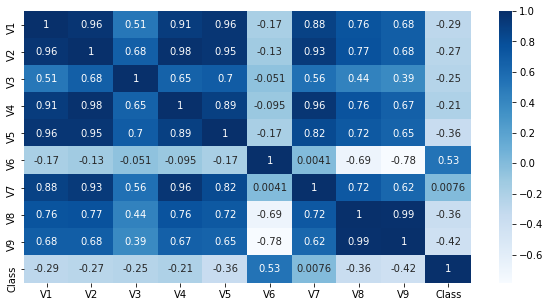

In [33]:
# Visualization of Correlations
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

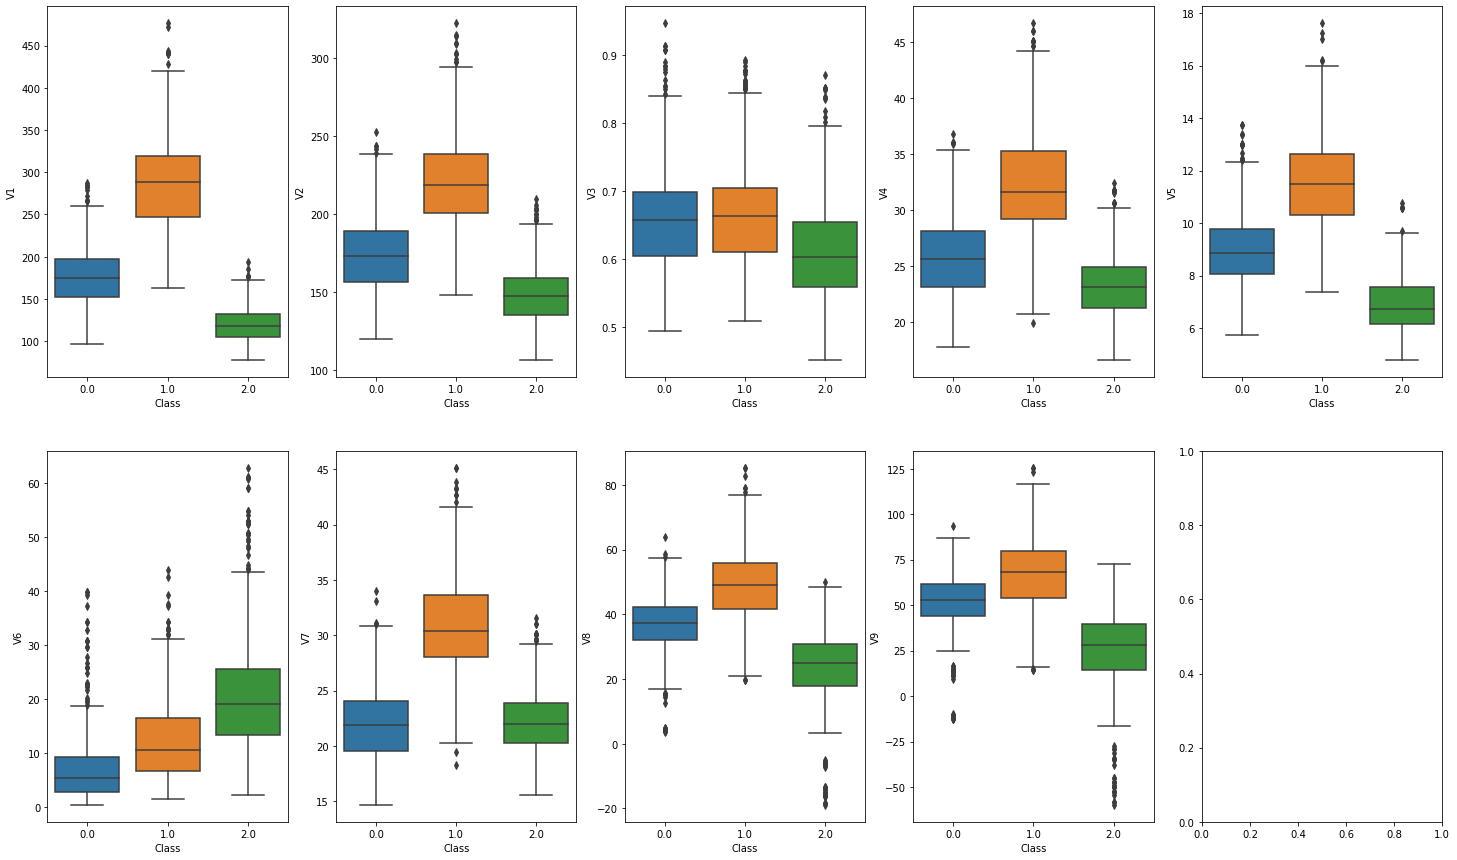

In [34]:
fig,ax=plt.subplots(nrows=2 ,ncols=5)

sns.boxplot(data=data,y='V1',x='Class',ax=ax[0,0])
sns.boxplot(data=data,y='V2',x='Class',ax=ax[0,1])
sns.boxplot(data=data,y='V3',x='Class',ax=ax[0,2])
sns.boxplot(data=data,y='V4',x='Class',ax=ax[0,3])
sns.boxplot(data=data,y='V5',x='Class',ax=ax[0,4])
sns.boxplot(data=data,y='V6',x='Class',ax=ax[1,0])
sns.boxplot(data=data,y='V7',x='Class',ax=ax[1,1])
sns.boxplot(data=data,y='V8',x='Class',ax=ax[1,2])
sns.boxplot(data=data,y='V9',x='Class',ax=ax[1,3])

fig.set_figwidth(25)
fig.set_figheight(15)

In [35]:
data['Class']=data['Class'].replace(0.0,'No Cancer')
data['Class']=data['Class'].replace(1.0,'Type I Cancer')
data['Class']=data['Class'].replace(2.0,'Type II Cancer')

In [36]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,271.996240,235.070094,0.752483,36.034604,11.808232,4.092972,33.969549,63.846127,93.722704,No Cancer
1,223.724058,224.347244,0.824954,33.601107,10.770778,2.322102,30.433429,58.544756,86.656083,No Cancer
2,246.553358,213.081332,0.682095,32.663880,10.703675,3.710110,30.791993,57.873877,84.955761,No Cancer
3,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,No Cancer
4,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,No Cancer


In [37]:
#Create x and y variables
x = data.drop('Class', axis=1)
Y = data['Class']

#Create Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.20,stratify=Y,random_state = 100)

In [38]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))])
pipeline.insert(0,pipe_logreg)


In [41]:
#Define Plot for learning curve
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()
    train_scores_mean = train_scores.mean(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(test_scores_mean, index = train_sizes))

# Plotting the learning curve 

Logistic Regression Learning Curve


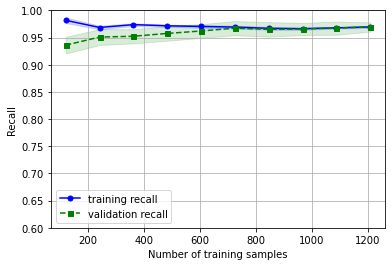

Mean training scores

 120     0.981667
241     0.968465
362     0.973757
483     0.971636
604     0.970364
725     0.969241
846     0.966903
967     0.966287
1088    0.967831
1209    0.969562
dtype: float64

 --------------------

Mean validation scores

 120     0.935998
241     0.950884
362     0.952360
483     0.957562
604     0.962029
725     0.967253
846     0.965025
967     0.965766
1088    0.967247
1209    0.969486
dtype: float64


In [51]:
#Plot Learning Curve
print('Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)


Model Evaluation - Accuracy Score
Logistic Regression 0.97 +/- 0.01




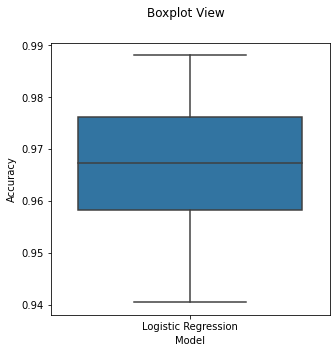

In [43]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,Y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [47]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)
x_2 = sc.fit_transform(x)

# Generating confusion matrix

In [48]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
#Test the model
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

                precision    recall  f1-score   support

     No Cancer       0.96      0.96      0.96       112
 Type I Cancer       0.97      1.00      0.99       112
Type II Cancer       0.98      0.96      0.97       112

      accuracy                           0.97       336
     macro avg       0.97      0.97      0.97       336
  weighted avg       0.97      0.97      0.97       336

0.9702380952380952


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Saving the model in pickle

In [52]:
pickle.dump(model,open('model.pkl','wb'))

# Making Predictions

In [53]:
p=model.predict([[226.0760274,194.5597645,0.594094744,29.93778152,9.526411365,10.85146248,28.28371313,45.71596378,63.14821443
]])
print(p[0])

Type I Cancer
